<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/multivariable-CASAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [18]:
# Import data
data = pd.read_csv('https://drive.google.com/uc?id=1VNg7M4u4wluLLqEeSgU3EEduFd6Q84NZ')
data.head(3)


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


In [29]:
# Extract data into X and y
X = data[['Size', 'Bedrooms']]
y = data['Price']

# Normalize our features

X = (X - X.mean()) / X.std()
X2=X

# Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X]

In [22]:
from sklearn.preprocessing import normalize
data1 = normalize(data, axis=0)
X1 = data1[:, 0:2]
Y1 = data1[:, 2:]


In [24]:
def standardize(x):
    """Standardize the original data set."""
    return (x - x.mean(axis=0))/ x.std(axis=0)



In [36]:
X3=standardize(X2)
X3 = np.c_[np.ones(X3.shape[0]), X3]

In [37]:
X.shape

(47, 3)

In [38]:
print(X[0:3,])

[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]]


In [39]:
print(X3[0:3,])

[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]]


In [4]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [5]:
def gradient_descent(X, y, theta, alpha, iters,epilon=10e-5):
    cost_array = np.zeros(iters)
    m = y.size
    convergencia=False
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
        if(abs(cost_array[i]- cost_array[i-1]) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            convergencia=True
            break
    if (convergencia == False):
      print("Convergencia NO Alcanzada !", i ," iteraciones")
    return theta, cost_array,i

In [6]:
# Set hyperparameters
alpha = 0.01
iterations = 10000
epsilon = 10e-5
# Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X, y, theta)
print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

With initial theta values of [0. 0. 0.], cost error is 65591548106.45744


In [7]:
theta, cost_num, num_iterations = gradient_descent(X, y, theta, alpha, iterations,epsilon)
print(theta)

Convergencia Alcanzada ! 2964  iteraciones
[340412.65957443 110630.88789245  -6649.31188442]


In [8]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(num_iterations), cost_num[0:num_iterations], 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

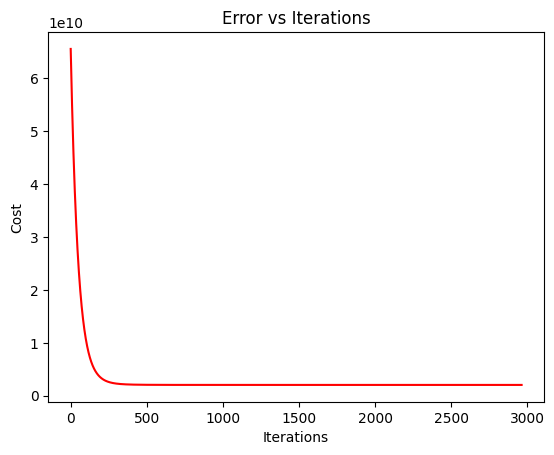

In [9]:
plotChart(num_iterations, cost_num)

In [10]:
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[340412.65957447 110631.05027885  -6649.47427082]
